In [2]:
import json
import pandas as pd
import numpy as np
from random import randrange
from matplotlib import pyplot as plt

Il seguente notebook viene usato solo per dare uno sguardo alla variabili presenti nel dataset, non verranno modificate ne rimosse

In primo luogo analizziamo le variabili che non costituisco la griglia.

In [3]:
df = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems.csv', index_col=0, encoding='utf-8')
df.iloc[:,0:16].head(10)

C:\Users\fra24\AppData\Local\Temp\ipykernel_8516\3120384550.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems.csv', index_col=0, encoding='utf-8')


,name,grade,userGrade,setby,method,userRating,repeats,isBenchmark,isMaster,upgraded,downgraded,holdsets,hasBetaVideo,apiId,dateInserted,holdsetup.description
0,Far from the Madding Crowd,6B+,6B+,Ben Moon,Feet follow hands,4,24993,True,False,False,False,Hold Set B,True,19215,2016-03-01T10:00:27,2016
1,Wuthering Heights,6B+,6B+,Ben Moon,Feet follow hands,4,35673,True,False,False,False,Hold Set A,True,19216,2016-03-01T10:00:27,2016
2,Problem 3,6B+,6B+,Ally Patrick,Feet follow hands,4,757,False,False,False,False,Original School Holds|Hold Set A|Hold Set B,False,19217,2016-03-01T10:00:16,2016
3,HARD TIMES,7A,7A,Ben Moon,Feet follow hands,5,8670,True,False,False,False,Hold Set B,True,19218,2016-03-01T10:00:15,2016
4,Problem 5,7A,7A,Ally Patrick,Feet follow hands,4,255,False,False,False,False,Hold Set B,False,19219,2016-03-01T10:00:15,2016
5,CRIME AND PUNISHMENT,7B,7B,Ben Moon,Feet follow hands,4,253,False,False,False,False,Original School Holds,True,19220,2016-03-01T10:00:15,2016
6,Shortround,6C+,6C+,Ally Patrick,Feet follow hands,4,550,False,False,False,False,Original School Holds,False,19221,2016-03-01T10:00:27,2016
7,Vurt,7B,7B,Ben Moon,Feet follow hands,4,1301,True,False,False,False,Hold Set A|Hold Set B,True,19222,2016-03-01T10:00:15,2016
8,Problem 9,7A+,7A+,Ally Patrick,Feet follow hands,4,2413,True,False,False,False,Hold Set A|Hold Set B,True,19223,2016-03-01T10:00:15,2016
9,Tess,6C+,6C+,Ben Moon,Feet follow hands,4,9617,True,False,False,False,Original School Holds|Hold Set A|Hold Set B,True,19224,2016-03-01T10:00:15,2016


In [4]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 139430 entries, 0 to 139429
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   name                   139430 non-null  object
 1   grade                  139430 non-null  object
 2   userGrade              76865 non-null   object
 3   setby                  139427 non-null  object
 4   method                 139430 non-null  object
 5   userRating             139430 non-null  int64 
 6   repeats                139430 non-null  int64 
 7   isBenchmark            139430 non-null  bool  
 8   isMaster               139430 non-null  bool  
 9   upgraded               139430 non-null  bool  
 10  downgraded             139430 non-null  bool  
 11  holdsets               139430 non-null  object
 12  hasBetaVideo           139430 non-null  bool  
 13  apiId                  139430 non-null  int64 
 14  dateInserted           139430 non-null  object
 15  holds

In [5]:
df.iloc[:,0:16].describe().round(2)

,userRating,repeats,apiId
count,139430.00,139430.00,139430.00
mean,3.47,48.43,367244.64
std,1.64,550.26,72914.32
min,0.00,0.00,19215.00
25%,4.00,1.00,334258.25
50%,4.00,4.00,372914.50
75%,4.00,12.00,419846.75
max,5.00,44491.00,462581.00


***VALORI MANCANTI:***

In [6]:
df.iloc[:,0:16].isna().sum()

name                         0
grade                        0
userGrade                62565
setby                        3
method                       0
userRating                   0
repeats                      0
isBenchmark                  0
isMaster                     0
upgraded                     0
downgraded                   0
holdsets                     0
hasBetaVideo                 0
apiId                        0
dateInserted                 0
holdsetup.description        0
dtype: int64

***Analisi univariate***

**grade**, livello di difficoltà assegnato dal creatore.

<Axes: ylabel='grade'>

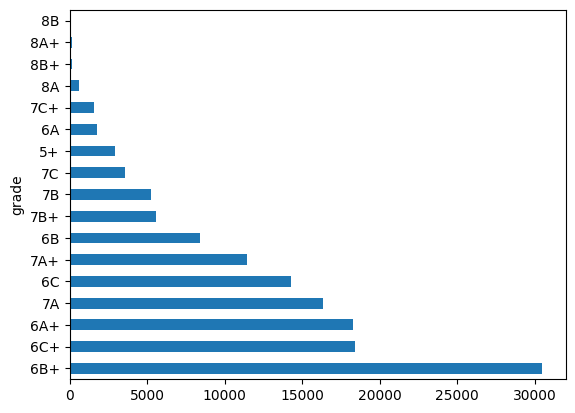

In [7]:
df["grade"].value_counts().plot(kind="barh")

**userGrade**, livello di difficoltà assegnato dagli utenti.

<Axes: ylabel='userGrade'>

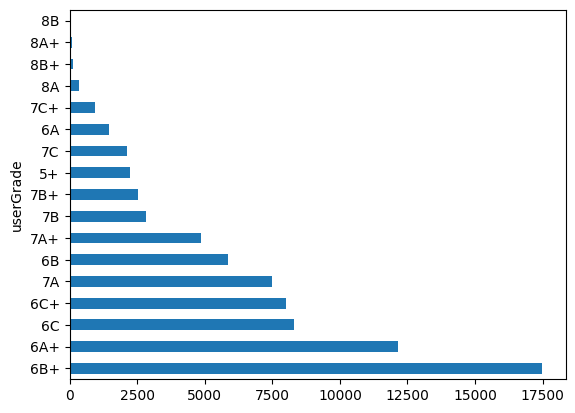

In [8]:
df["userGrade"].value_counts().plot(kind="barh")

**method**, foot rules da utilizzare per completare il problema.

<Axes: ylabel='method'>

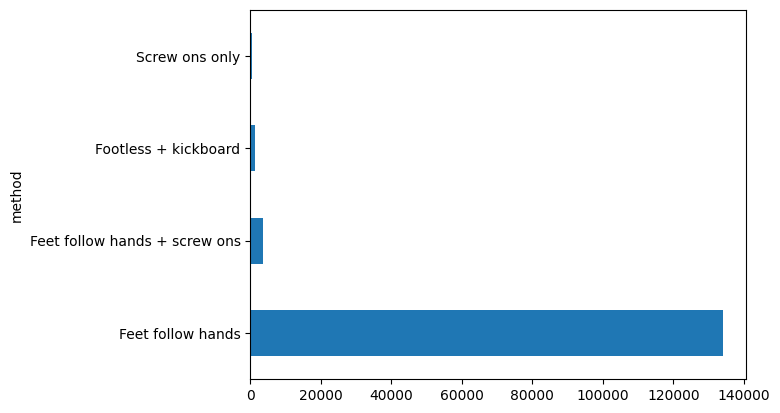

In [9]:
df["method"].value_counts().plot(kind="barh")

**userRating**, valutazione degli utenti del problema.

In [10]:
(df["userRating"].value_counts() / df.shape[0]).sort_index()

userRating
0    0.160539
1    0.009438
2    0.007846
3    0.069863
4    0.530008
5    0.222305
Name: count, dtype: float64

**repeats**, numero di volte che un problema è stato completato.

In [11]:
df["repeats"].describe().round(3)

count    139430.000
mean         48.434
std         550.255
min           0.000
25%           1.000
50%           4.000
75%          12.000
max       44491.000
Name: repeats, dtype: float64

**isBenchmark**, indica se il problema è stato tracciato da Moonboard.

In [12]:
(df["isBenchmark"].value_counts() / df.shape[0]).round(4)

isBenchmark
False    0.9898
True     0.0102
Name: count, dtype: float64

**isMaster**, indica se il problema è usato in competizioni.


In [13]:
(df["isMaster"].value_counts() / df.shape[0])

isMaster
False    0.999857
True     0.000143
Name: count, dtype: float64

**hasBetaVideo**, se il problema ha un video in cui si mostra la risoluzione.

In [14]:
(df["hasBetaVideo"].value_counts() / df.shape[0])

hasBetaVideo
False    0.971054
True     0.028946
Name: count, dtype: float64

**holdsets**, tipo di prese utilizzate per la tracciatura.


In [15]:
df["holdsets"].value_counts() #molti dubbi su questa colonna

holdsets
Original School Holds|Hold Set A|Hold Set B                            32702
Hold Set A|Hold Set B                                                  24720
Hold Set A|Hold Set B|Hold Set C                                       12873
Original School Holds|Hold Set A|Hold Set B|Hold Set C                  8615
Original School Holds|Hold Set A|Hold Set B|Hold Set C|Wooden Holds     4963
                                                                       ...  
Wooden Holds|Wooden Holds B                                               43
Original School Holds|Wooden Holds|Wooden Holds B                         32
Hold Set B|Wooden Holds B                                                 31
Original School Holds|Wooden Holds B                                      19
Wooden Holds B                                                             5
Name: count, Length: 78, dtype: int64

**holdsetup.description**, anno della Moonboard e grado di inclinazione del problema.

<Axes: ylabel='holdsetup.description'>

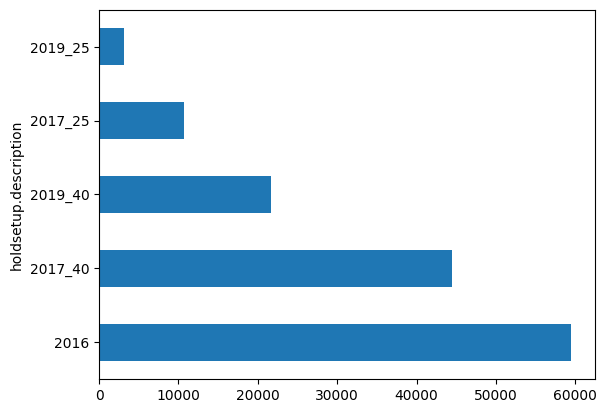

In [16]:
df["holdsetup.description"] = df["holdsetup.description"].replace(2016, "2016")
df["holdsetup.description"].value_counts().plot(kind="barh")

**Variabili A1, A2, ..., K17, K18.**

In [17]:
columns = df.loc[:, "A1":"K18"].columns
result = df[columns].apply(lambda col: col.value_counts() / df.shape[0])

In [25]:
result.iloc[:, 0:5].round(3)

,A1,A2,A3,A4,A5
0,0.997,0.993,0.990,0.982,0.922
1,0.001,0.003,0.005,0.005,0.008
2,0.002,0.004,0.005,0.013,0.071
3,NaN,NaN,NaN,NaN,NaN


In [26]:
result.iloc[:, 193:198].round(3)

,K14,K15,K16,K17,K18
0,0.984,0.988,0.99,0.997,0.932
1,0.016,0.012,0.01,0.003,0.000
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.068


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_observation(df, apiId):
    relevant_columns = sorted(
        [col for col in df.columns if col[0] in "ABCDEFGHIJK" and col[1:].isdigit()],
        key=lambda x: (x[0], int(x[1:]))
    )
    
    if not relevant_columns:
        print("Nessuna colonna rilevante trovata (A1-K18).")
        return
    
    row = df[df['apiId'] == apiId]
    if row.empty:
        print(f"apiId {apiId} non trovato.")
        return

    name = row['name'].values[0]

    try:
        obs = row[relevant_columns].to_numpy().reshape((11, 18))  # (Y=18, X=11)
    except ValueError as e:
        print(f"Errore durante il reshape: {e}")
        print(f"Assicurati che ci siano esattamente 198 valori (18x11) per apiId {apiId}.")
        return

    # Ruota la matrice di 90 gradi a sinistra
    obs_rotated = np.transpose(obs)[::-1]

    obs = obs_rotated

    # Definisci una mappa di colori personalizzata
    cmap = ListedColormap(["white", "black", "green", "red"])
    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=3)

    plt.figure(figsize=(6, 6))
    plt.imshow(obs, cmap=cmap, norm=norm, aspect="equal")  

    plt.yticks(ticks=np.arange(18), labels=np.arange(18, 0, -1))  # X da 'A' a 'K'
    plt.xticks(ticks=np.arange(11), labels=list("ABCDEFGHIJK"))  # Y da 18 a 1

    plt.title(f"Problem: {name}")

    plt.show()

    filtered_row = df[df['apiId'] == apiId]

    if not filtered_row.empty:
        print("Grade:", filtered_row['grade'].values[0])
        print("User Grade:", filtered_row['userGrade'].values[0])
        print("Repeats:", filtered_row['repeats'].values[0])
        print("SetBy:", filtered_row['setby'].values[0])
        print("HoldSetup.Description:", filtered_row['holdsetup.description'].values[0])
        print("Benchmark:", filtered_row['isBenchmark'].values[0])
    else:
        print("Nessuna osservazione trovata")

In [30]:
import random

def random_apiId_generator(df):
    api_ids = df['apiId'].unique()
    
    while True:
        yield random.choice(api_ids)

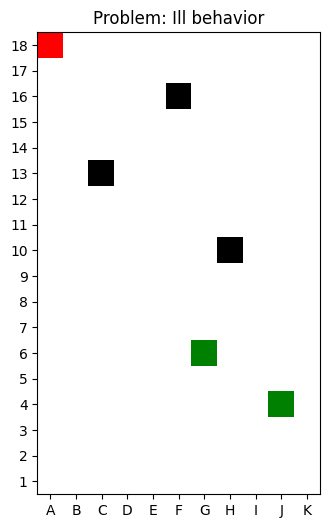

Grade: 6C
User Grade: 6C
Repeats: 8
SetBy: luca di cino
HoldSetup.Description: 2017_40
Benchmark: False


In [34]:
apiId_gen = random_apiId_generator(df)
x = next(apiId_gen)
plot_observation(df, apiId=x)